In [86]:
import pandas as pd 
import missingno as msno
import json

## importa os dados

In [87]:
dados = pd.read_csv(r"C:\Users\gabri\codenation\coestatistica-1\desafio1.csv")

## Verifica se existe valores faltantes

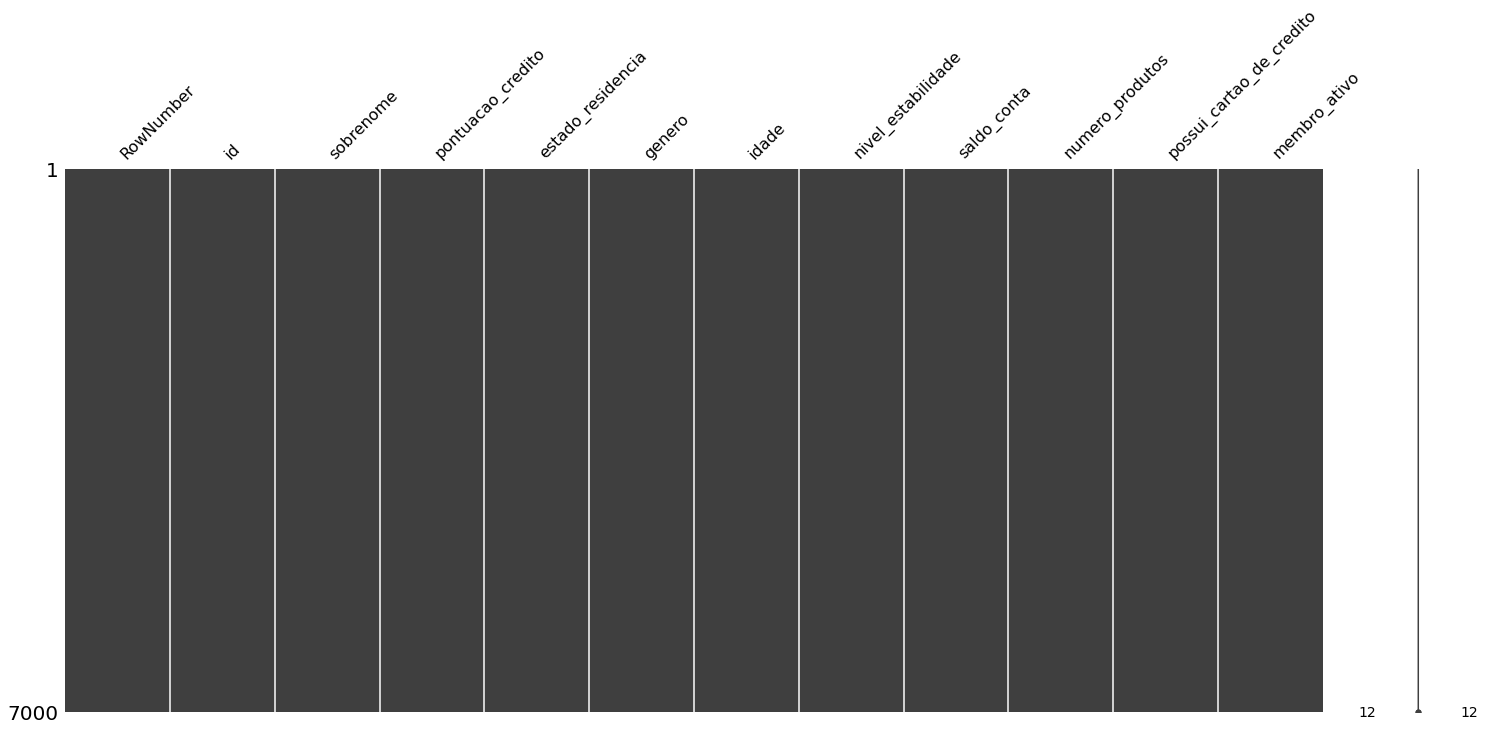

In [88]:
msno.matrix(dados)

## Agrupa os dados por estado

In [89]:
dados_agrupados=dados.groupby("estado_residencia")["pontuacao_credito"]

## Dando uma olha nos dados

In [90]:
dados_agrupados.describe()

,count,mean,std,min,25%,50%,75%,max
estado_residencia,,,,,,,,
PR,1731.0,648.961294,98.607186,350.0,581.0,650.0,719.5,850.0
RS,1750.0,651.105143,95.136598,350.0,585.0,650.0,717.0,850.0
SC,3519.0,649.537653,97.233493,359.0,581.0,653.0,717.0,850.0


## Abrindo o arquivo de resposta

In [91]:
with open(r"C:\Users\gabri\codenation\coestatistica-1\submission.json","r+") as json_file:
    data = json.load(json_file)

## coletando as medidas para cada estado

In [92]:
data["PR"]["mediana"]=int(dados_agrupados.median()["PR"])
data["PR"]["media"]=float(dados_agrupados.mean()["PR"])
data["PR"]["desvio_padrao"]=float(dados_agrupados.std()["PR"])

#GroupBy nao tem por padrao a funcao moda , logo foi necessario fazer manualmente com o agg:
data["PR"]["moda"]=int(dados.groupby("estado_residencia")["pontuacao_credito"].agg(pd.Series.mode)["PR"])


In [93]:
data["RS"]["mediana"]=int(dados_agrupados.median()["RS"])
data["RS"]["media"]=float(dados_agrupados.mean()["RS"])
data["RS"]["desvio_padrao"]=float(dados_agrupados.std()["RS"])

#GroupBy nao tem por padrao a funcao moda , logo foi necessario fazer manualmente com o agg:
data["RS"]["moda"]=int(dados.groupby("estado_residencia")["pontuacao_credito"].agg(pd.Series.mode)["RS"])

In [94]:
data["SC"]["mediana"]=int(dados_agrupados.median()["SC"])
data["SC"]["media"]=float(dados_agrupados.mean()["SC"])
data["SC"]["desvio_padrao"]=float(dados_agrupados.std()["SC"])

#GroupBy nao tem por padrao a funcao moda , logo foi necessario fazer manualmente com o agg:
data["SC"]["moda"]=int(dados.groupby("estado_residencia")["pontuacao_credito"].agg(pd.Series.mode)["SC"])

## Salvando no arquivo as respostas

In [98]:
with open(r"C:\Users\gabri\codenation\coestatistica-1\submission.json","w") as json_file:
    json.dump(data,json_file)